In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Toy dataset

In [16]:
Train_X = torch.arange(10).to(torch.float32).reshape(10,1)
Train_X_Norm = (Train_X - Train_X.mean())/ Train_X.std()

In [17]:
Train_Y = torch.tensor([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

# Visualize

Text(0, 0.5, '$y$')

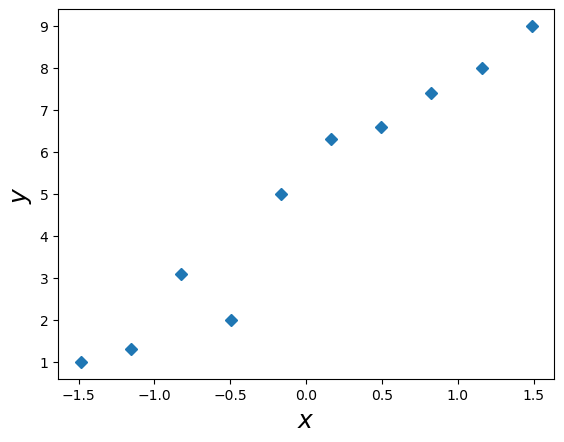

In [18]:
plt.plot(Train_X_Norm, 
         Train_Y,
         linestyle="",
         marker="D")
plt.xlabel("$x$", size=18)
plt.ylabel("$y$", size=18)

# Initialize Dataloader iterator

In [19]:
toy_data = TensorDataset(Train_X_Norm, Train_Y)
toy_data[0]

(tensor([-1.4863]), tensor(1.))

In [20]:
data = DataLoader(toy_data, batch_size=1)
next(iter(data))

[tensor([[-1.4863]]), tensor([1.])]

# Initialize trainable parameters

In [21]:
weights = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

# Model 

In [22]:
def model(x):
    return x @ weights + bias

# Loss Function

In [23]:
def loss_func(prediction, label):
    return ((prediction - label).pow(2)).mean()

# Train

In [24]:
learning_rate = 0.001
epoch = 200
for i in range(epoch):
    for x, y in data:
        pred = model(x)
        loss = loss_func(pred, y)
        loss.backward()
    with torch.no_grad():
        weights -= weights.grad * learning_rate
        bias -= bias.grad * learning_rate
        weights.grad.zero_()
        bias.grad.zero_()
    if (i % 10 == 0):
        print(f"Epoch: {i+1}, Error: {loss}")

Epoch: 1, Error: 80.21822357177734
Epoch: 11, Error: 54.029178619384766
Epoch: 21, Error: 36.31801986694336
Epoch: 31, Error: 24.352272033691406
Epoch: 41, Error: 16.278453826904297
Epoch: 51, Error: 10.839491844177246
Epoch: 61, Error: 7.182991981506348
Epoch: 71, Error: 4.731164932250977
Epoch: 81, Error: 3.0925004482269287
Epoch: 91, Error: 2.001868724822998
Epoch: 101, Error: 1.2798612117767334
Epoch: 111, Error: 0.8051828145980835
Epoch: 121, Error: 0.49592018127441406
Epoch: 131, Error: 0.2968473434448242
Epoch: 141, Error: 0.17080076038837433
Epoch: 151, Error: 0.09282924234867096
Epoch: 161, Error: 0.046232447028160095
Epoch: 171, Error: 0.019876370206475258
Epoch: 181, Error: 0.006375596858561039
Epoch: 191, Error: 0.0008618868887424469


# To visualize regression line

In [25]:
prediction = model(Train_X_Norm).detach()

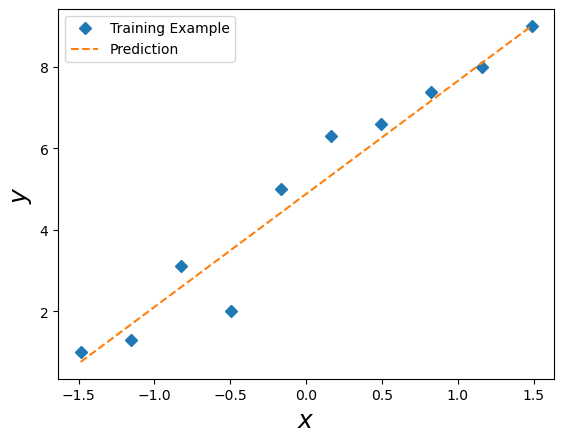

In [26]:
plt.plot(Train_X_Norm,
         Train_Y,
         linestyle="",
         marker="D")

plt.plot(Train_X_Norm,
         prediction,
         linestyle="--")


plt.xlabel("$x$", size=18)
plt.ylabel("$y$", size=18)

plt.legend(['Training Example', 'Prediction'])